# KJ Chapter 3: Data Preprocessing

## Exercise 1 

The UC Irvine Machine Learning Repository6 contains a data set related
to glass identification. The data consist of 214 glass samples labeled as one
of seven class categories. There are nine predictors, including the refractive
index and percentages of eight elements: Na, Mg, Al, Si, K, Ca, Ba, and Fe.
The data can be accessed via:


In [45]:
#| echo : false
import kaggle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
# | echo : false
pd.set_option('display.max_columns', 10)
plt.rcParams['figure.figsize'] = (10, 6)

In [47]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('uciml/glass', path='./', unzip=True)

In [43]:
df_glass = pd.read_csv('glass.csv')

df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
X = df_glass.drop(['Type'], axis = 1)
y = df_glass.Type

### Part A

#### Using visualizations, explore the predictor variables to understand their distributions as well as the relationships between predictors.


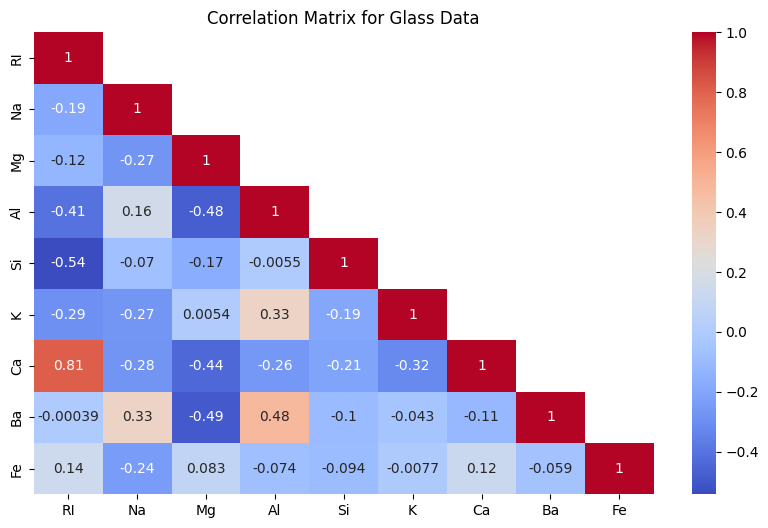

In [42]:
# calc corr between predictors
correlation_matrix = X.corr()
mask = np.triu(correlation_matrix) # halves the matrix 
np.fill_diagonal(mask, False) # shows the diagonal 
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True, mask = mask ).set_title('Correlation Matrix for Glass Data')
plt.show()

In [39]:
df_glass.describe().T # transpose it since its easier to view this way

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


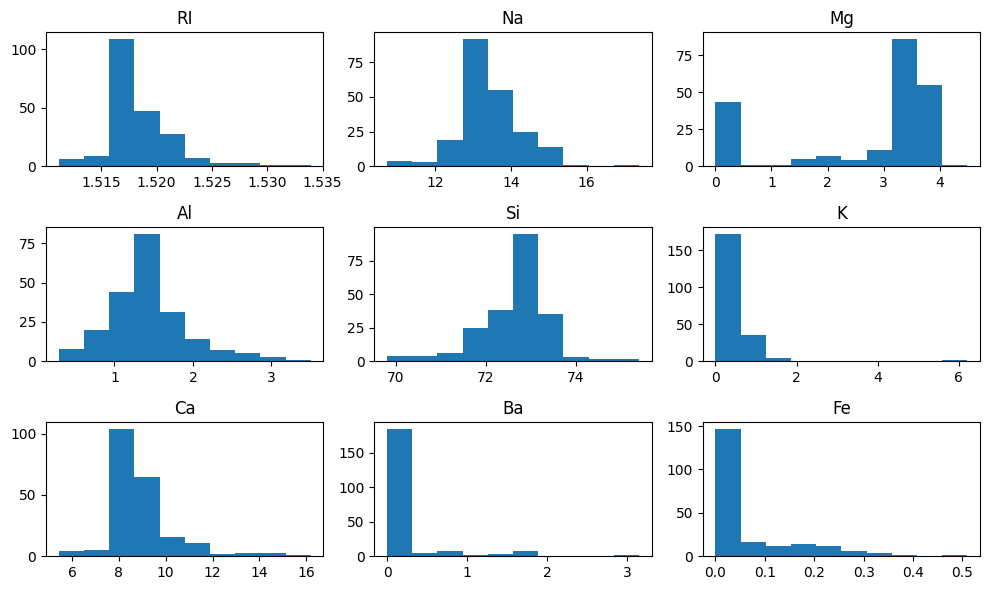

In [64]:
X.hist(grid=False)
plt.tight_layout()
plt.show()

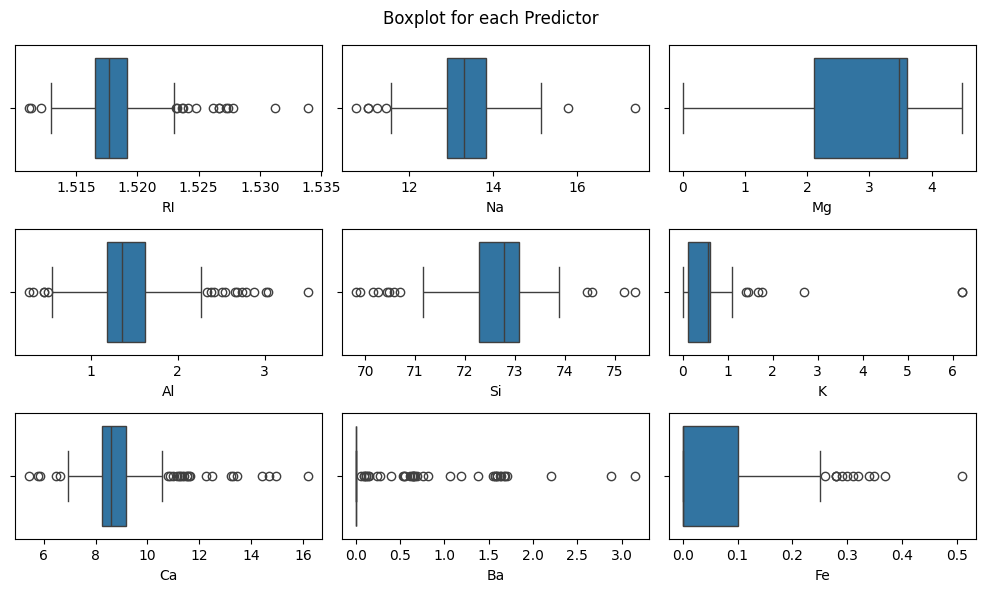

In [96]:
fig, ax = plt.subplots(nrows=3, ncols=3)

for i, col in enumerate(X.columns):
     sns.boxplot(x=col, data=X, ax=ax.flatten()[i])

fig.suptitle('Boxplot for each Predictor')
plt.tight_layout()
plt.show()   


### Part B

#### Do there appear to be any outliers in the data? Are any predictors skewed?


If we consider data outside the IQR, then almost all predictors have outliers with the expection of `Mg` column having no visuable outliers. The column with the most outliers seems to be `Ba` suggests that Barium is not a common ingredient in glass while the amount of magnesiumn found in glass fairly common. Moreover, another method to detect outliers that I like to use is z-scores where we consider a datapoint to be an outliers if it is more than 1.96 standard deviations away from the mean since that should capture 95% of the data. 

All of the predictors are skewed albeit some are more skewed than others. For instance, `K`,`Ba` and `Fe` looks more like a poisson distribution with a low-value lambda. 


### Part C

#### Are there any relevant transformations of one or more predictors that might improve the classification model?

Some transformations we might use to improve the classification model is a log transform so that the distribution resembles normality. Specifically for models that assume normal data such as a linear regression. Another transformation, I would suggest is to standardize the predictors where their scales are from -1 to 1 or normalize the scale from 0-1 which ever works better for the task.

---

## Exercise 2

The soybean data can also be found at the UC Irvine Machine Learning
Repository. Data were collected to predict disease in 683 soybeans. The 35
predictors are mostly categorical and include information on the environmental
conditions (e.g., temperature, precipitation) and plant conditions (e.g., left
spots, mold growth). The outcome labels consist of 19 distinct classes.

In [97]:
from ucimlrepo import fetch_ucirepo 
  
soybean_large = fetch_ucirepo(id=90) 
  
X = soybean_large.data.features 
y = soybean_large.data.targets 

In [110]:
X.head()

,date,plant-stand,precip,temp,hail,...,mold-growth,seed-discolor,seed-size,shriveling,roots
0,6.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [109]:
X.shape

(307, 35)

In [100]:
y.nunique()

class    19
dtype: int64

Making sure the correct dataset is loaded. It seems the data from UC Irvine has less observations from the data in the R library mlbench

### Part A 
#### Investigate the frequency distributions for the categorical predictors. Are any of the distributions degenerate in the ways discussed earlier in this chapter?


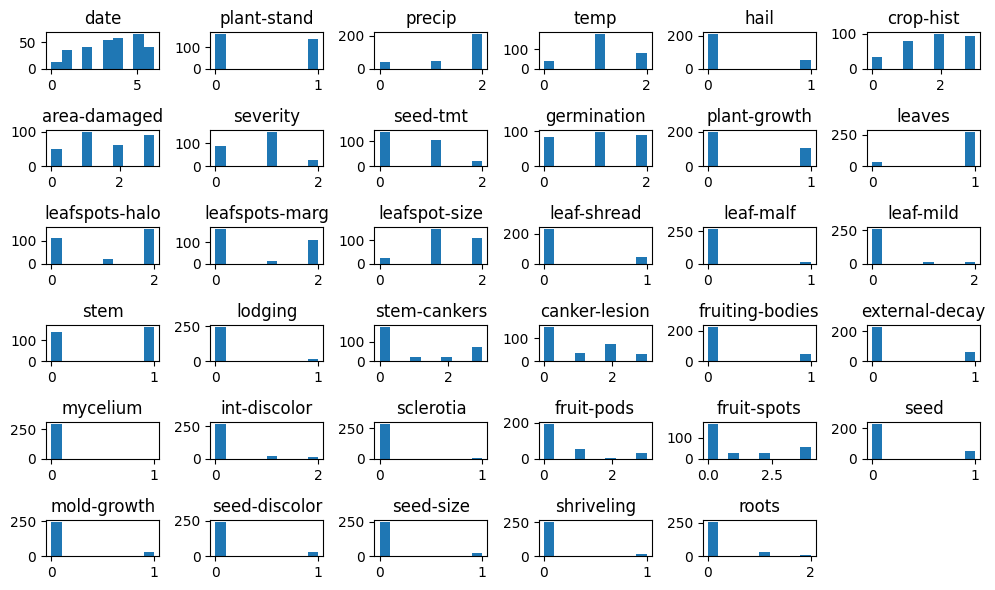

In [124]:
X.hist(grid=False)
plt.tight_layout()
plt.show()

In [139]:
X.mycelium.value_counts()


mycelium
0.0    294
1.0      2
Name: count, dtype: int64

In [140]:
X.mycelium.var()

0.006733852496564359

While there no predictors will a 100% denegerate distribution, there are definitely a lot of predictors that are very close to the denegerate distribution just to name a few: `mycelium` is the closest to a complete degenerate distribution, and others like `seed-size`, `shriveling`, and `sclerotia`.


### Part B

#### Roughly 18% of the data are missing. Are there particular predictors that are more likely to be missing? Is the pattern of missing data related to the classes?


In [152]:
X.isna().sum().sort_values(ascending=False).head(10)


hail               41
lodging            41
severity           41
seed-tmt           41
germination        36
fruit-spots        35
fruiting-bodies    35
shriveling         35
seed-discolor      35
leaf-mild          30
dtype: int64

We have 41 rows with at least one missing data.

In [123]:
41 / X.shape[0]

0.13355048859934854

In [151]:
#| echo : false
df_soybean = X
df_soybean['class'] = soybean_large.data.targets 


In [153]:
df_soybean.mycelium.isna().sum()

11

In [166]:
df_soybean.groupby('class').apply(lambda x: x.isna().sum().sum()).sort_values(ascending = False)


class
phytophthora-rot               390
cyst-nematode                  144
herbicide-injury                80
diaporthe-pod-&-stem-blight     68
2-4-d-injury                    30
brown-spot                       0
brown-stem-rot                   0
charcoal-rot                     0
bacterial-pustule                0
alternarialeaf-spot              0
diaporthe-stem-canker            0
downy-mildew                     0
frog-eye-leaf-spot               0
bacterial-blight                 0
phyllosticta-leaf-spot           0
anthracnose                      0
powdery-mildew                   0
purple-seed-stain                0
rhizoctonia-root-rot             0
dtype: int64

This exercise reiterates the importance of domain knowledge in this field. For the soybean dataset, understanding the "mycelium" is a fungi, after a google search, represents whether the soybean plant has fungi or not clarifies the possible reasons why it is missing 11 values. Due to the nature of this binary condition indicates that those 11 was possibly not recorded as the cause of missingness. The documentation confirms that all predictors are categorical with ranks ranging from 2-6.

Futher examiniation of the data reveals that certain soybean classes hold higher concentration of missing data suggesting systematic missingness rather missingness completely at random (MCAR). Leading our examination to the data colleciton process for specifically those classes.

### Part C

#### Develop a strategy for handling missing data, either by eliminating predictors or imputation.

We would consider completely removing the 2-3 classes with the most missing values because we suspect that the missing value was possibly due to errors in data collection. While for rest of the missing values, we suggest employing a combination of imputation techniques in a way it mitigates its impact on the ditribution of each predictor and the quality of the predictions after model training.